---
title: "Lab 2"
format: 
    html:
        embed-resources: true
code-fold: true
echo: true
---

In [2]:
#0 import the data and declare your package dependencies
import pandas as pd
import numpy as np

df = pd.read_csv("avocado-updated-2020.csv")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


The data set contains information about the weekly retail data for the volume of units and the price. There are columns such as the date of the purchase, the average price of an avocado, the type, and the specific PLU.

In [3]:
#2 Clean the data in any way you see fit
region_map = {
    "Albany": "Northeast","Boston": "Northeast","Buffalo/Rochester": "Northeast",
    "Harrisburg/Scranton": "Northeast","Hartford/Springfield": "Northeast",
    "New York": "Northeast","Northern New England": "Northeast","Philadelphia": "Northeast",
    "Pittsburgh": "Northeast","Syracuse": "Northeast","Northeast": "Northeast",
    "Chicago": "Midwest","Cincinnati/Dayton": "Midwest","Columbus": "Midwest",
    "Detroit": "Midwest","Grand Rapids": "Midwest","Great Lakes": "Midwest",
    "Indianapolis": "Midwest","Plains": "Midwest","St. Louis": "Midwest",
    "Atlanta": "South","Baltimore/Washington": "South","Charlotte": "South",
    "Dallas/Ft. Worth": "South","Houston": "South","Jacksonville": "South",
    "Louisville": "South","Miami/Ft. Lauderdale": "South","Midsouth": "South",
    "Nashville": "South","New Orleans/Mobile": "South","Orlando": "South",
    "Raleigh/Greensboro": "South","Richmond/Norfolk": "South","Roanoke": "South",
    "South Carolina": "South","South Central": "South","Southeast": "South",
    "Tampa": "South","West Tex/New Mexico": "South",
    "Boise": "West","California": "West","Denver": "West","Las Vegas": "West",
    "Los Angeles": "West","Phoenix/Tucson": "West","Portland": "West",
    "Sacramento": "West","San Diego": "West","San Francisco": "West",
    "Seattle": "West","Spokane": "West","West": "West",
    "Total U.S.": "National"

}
avocado_clean = df.copy()
avocado_clean["region"] = avocado_clean["geography"].map(region_map)
avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,South
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,South
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,South


In [4]:
# Which major geographical region sold the most total organic, small Hass avocados in 2017?
df_2017 = avocado_clean[avocado_clean["year"] == 2017]
filtered_df = df_2017[df_2017["type"] == "organic"]
sales_by_region = filtered_df.groupby("region")["4046"].sum().sort_values(ascending=False)
sales_by_region

,4046
region,
National,6882024.42
West,5715150.38
South,3516236.28
Northeast,1777706.55
Midwest,514184.91


Not including the national region, it looks like the avocado sales of organic, small Hass avocados in 2017 were the highest in the west region.

In [5]:
# Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?
avocado_clean["date"] = pd.to_datetime(avocado_clean["date"], errors = "coerce")
avocado_clean["year"] = avocado_clean["date"].dt.year
avocado_clean["month"] = avocado_clean["date"].dt.month
avocado_clean["day"] = avocado_clean["date"].dt.day

monthly_avg = avocado_clean.groupby("month")["total_volume"].mean().sort_values(ascending=False)
monthly_avg = monthly_avg.astype(int)
monthly_avg

,total_volume
month,
5,1123632
2,1095373
6,1051246
4,1016581
3,995715
1,985312
7,983268
8,949924
9,906477


The month with the highest average volume of avocado sales is month 5, so May.

In [10]:
# Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions
# with the highest averages for the total_volume variable.
import plotnine as p9
from plotnine import ggplot, aes, geom_boxplot, labs, theme_minimal
excluded_regions = [
    "West","Northeast","South Central","Southeast","Midsouth","Great Lakes", "Plains","Northern New England","California","South Carolina","Total U.S.","National"
]
df_metro = avocado_clean[~avocado_clean["geography"].isin(excluded_regions)]
volume_avg = df_metro.groupby("geography")["total_volume"].mean().sort_values(ascending=False)
volume_avg = volume_avg.astype(int)
top5_metros = volume_avg.head(5).index.tolist()

top5_df = df_metro[df_metro["geography"].isin(top5_metros)]
top5_df["geography"] = top5_df["geography"].astype("category")

/tmp/ipython-input-2560575666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


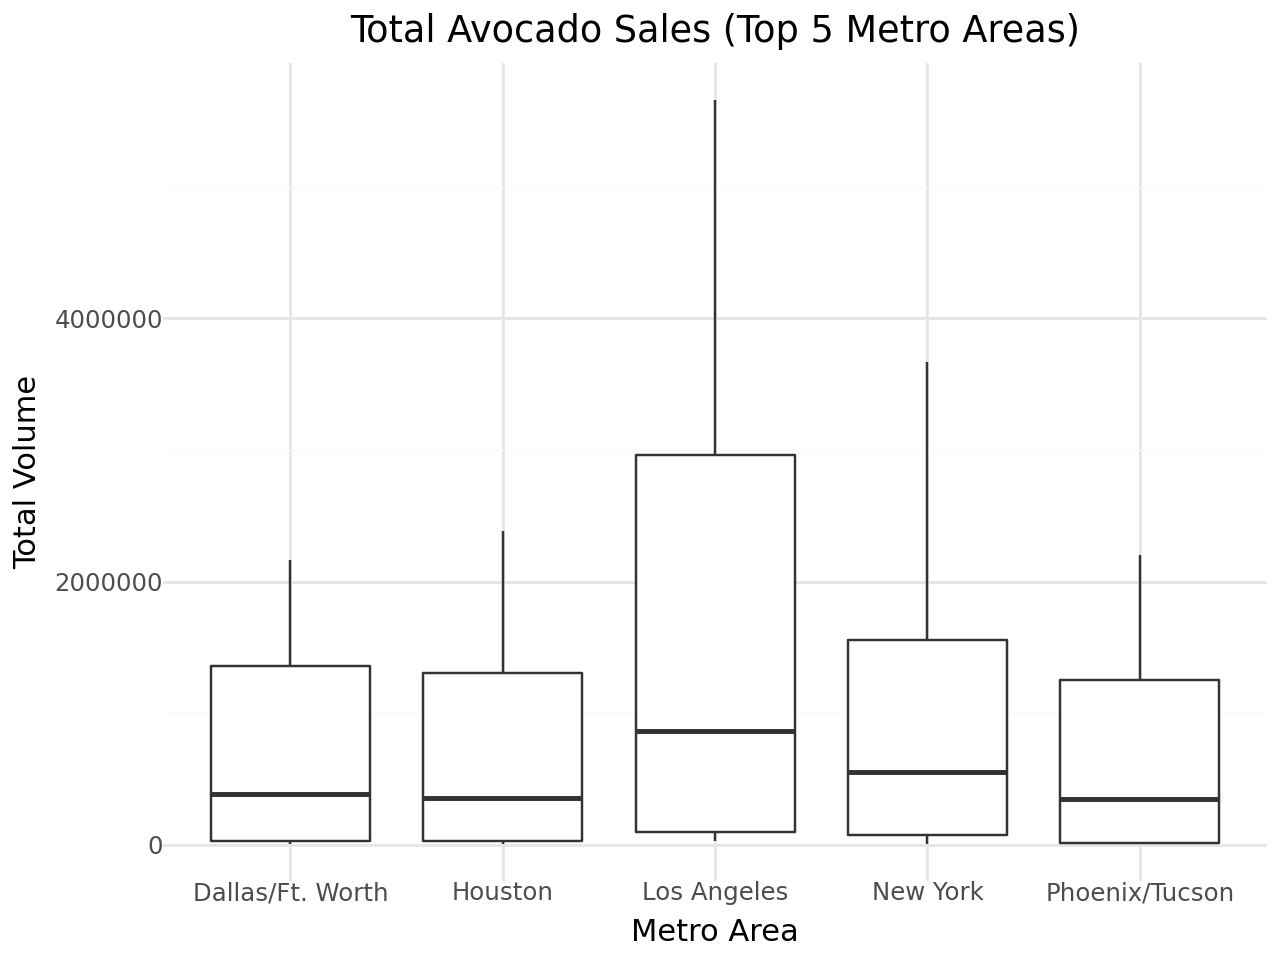

In [14]:
plot = (p9.ggplot(
    top5_df, aes(
        x = "geography",
        y = "total_volume"
    )
)
+ geom_boxplot()
+ labs (
    title = "Total Avocado Sales (Top 5 Metro Areas)",
    x = "Metro Area",
    y = "Total Volume"
)
+ theme_minimal()
)
plot

In [15]:
# From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.
cali_regions = ["Los Angeles","San Diego","Sacramento","San Francisco"]
cali_avocado = avocado_clean[avocado_clean["geography"].isin(cali_regions)].copy()
cali_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,1,4


In [16]:
# In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.
summary = (cali_avocado.groupby(["geography","type"])["average_price"].agg(["mean","median","std","count"]).reset_index())
price_diff = (
    summary.pivot(index="geography", columns="type", values="mean")
    .assign(difference=lambda x: abs(x["organic"] - x["conventional"]))
    .sort_values("difference", ascending=False)
)
price_diff

type,conventional,organic,difference
geography,,,
San Francisco,1.400490,2.119444,0.718954
San Diego,1.113856,1.798366,0.684510
Sacramento,1.295359,1.873856,0.578497
Los Angeles,1.047124,1.574902,0.527778


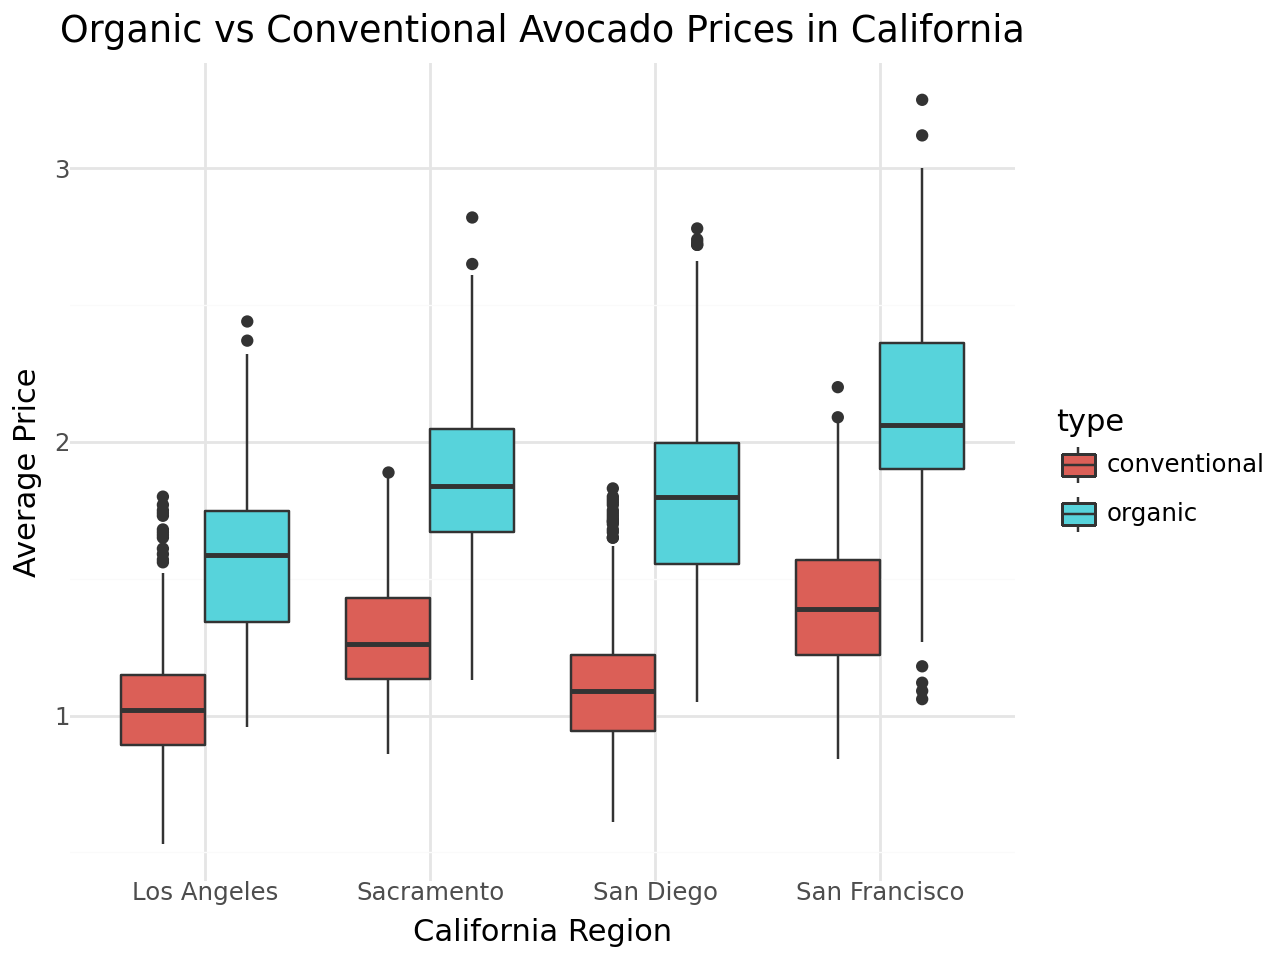

In [17]:
plot2 = (
    p9.ggplot(
        cali_avocado, aes(
            x = "geography",
            y = "average_price",
            fill = "type"
        )
    )
    + geom_boxplot(position="dodge")
    + labs(
        title = "Organic vs Conventional Avocado Prices in California",
        x = "California Region",
        y = "Average Price"
    )
    + theme_minimal()
)
plot2

In [21]:
# The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large;
# conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the
# content of this plot.
from plotnine import geom_bar, facet_wrap
group = (
    cali_avocado.groupby(["geography","type"],as_index=False)[["4046","4225","4770"]].mean()
)
tidy = group.melt(id_vars=["geography","type"],value_vars=["4046","4225","4770"],var_name="code_size",value_name="avg_units")
plu_map = {"4046":"Small","4225":"Large","4770":"Xlarge"}
tidy["size"] = tidy["code_size"].map(plu_map)

tidy["prop"] = (
    tidy.groupby(["geography","type"])["avg_units"].transform(lambda x: x / x.sum())
)

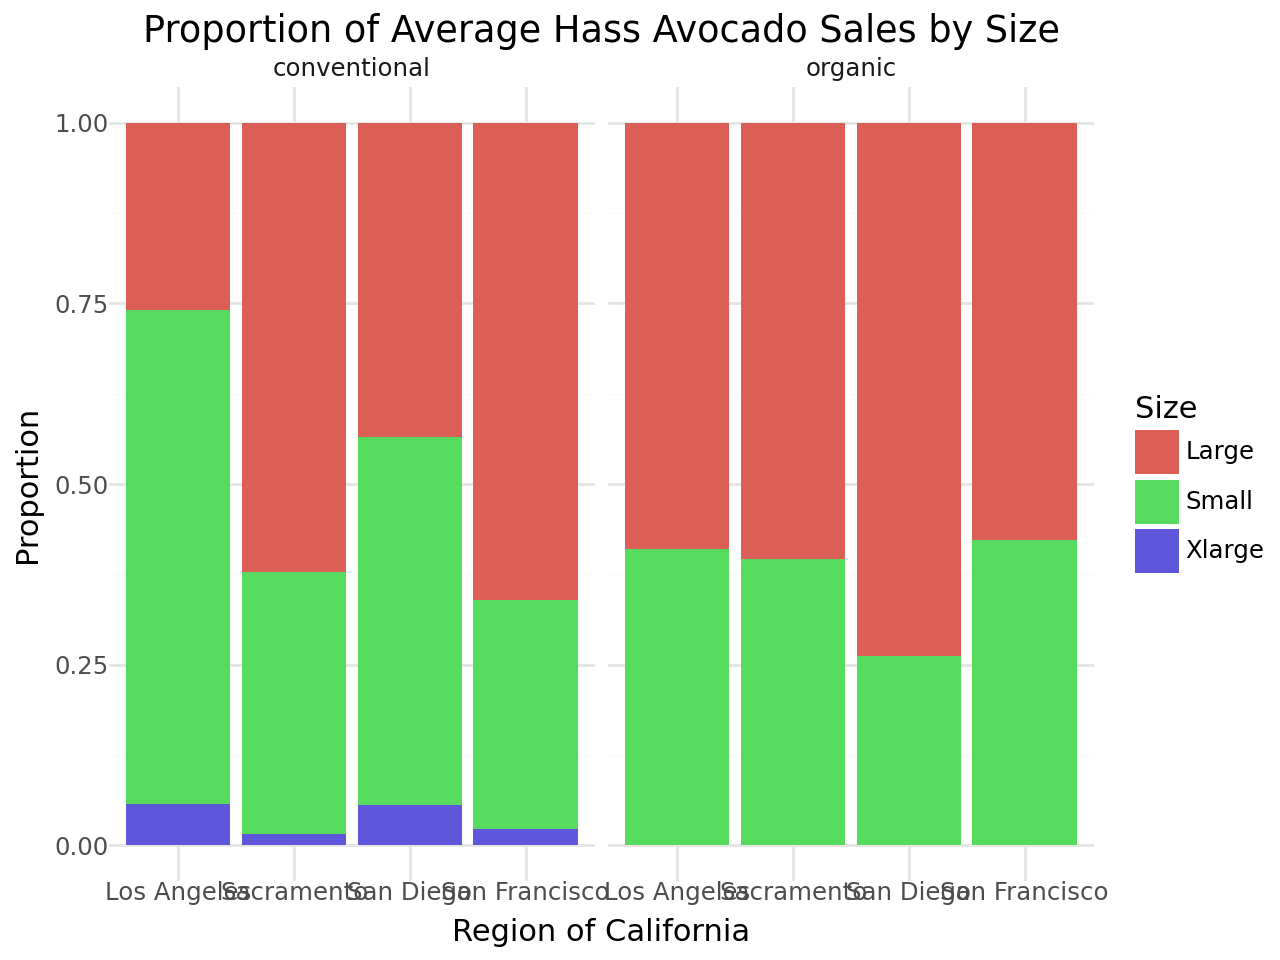

In [22]:
plot3 = (
    p9.ggplot(tidy, aes(x="geography",y="prop",fill="size"))
    + geom_bar(stat="identity",position="stack")
    + facet_wrap("~ type",nrow=1)
    +labs(
        title = "Proportion of Average Hass Avocado Sales by Size",
        x = "Region of California",
        y = "Proportion",
        fill = "Size"
    )
    + theme_minimal()
    )
plot3

In [24]:
# Using Outside Data
housing_df = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,102001,0,United States,country,NaN,123266.200632,123483.065395,123752.009633,124328.842231,124992.707395,...,364462.357353,365188.640378,365823.798029,366287.152111,366009.670511,365477.500729,364786.658389,364164.687570,363734.792944,363505.418222
1,394913,1,"New York, NY",msa,NY,220834.762563,221773.185705,222720.300336,224639.521066,226626.940595,...,690755.304890,692575.728852,693669.194915,694977.328807,696695.225717,699159.431275,700949.662026,702443.165533,703629.915468,704429.490778
2,753899,2,"Los Angeles, CA",msa,CA,222015.511375,222841.690769,223942.153841,226131.705683,228526.388970,...,961498.007841,965544.021513,966083.013802,964049.558192,958942.953993,954617.341638,949834.733548,945472.000401,942874.715529,941801.259283
3,394463,3,"Chicago, IL",msa,IL,156057.927247,156202.391427,156477.526001,157161.992446,157985.323252,...,331806.815527,333077.217269,334445.324061,335814.963432,336675.321538,337286.526381,337582.082090,337949.183099,338802.799156,339815.521916
4,394514,4,"Dallas, TX",msa,TX,128589.525231,128646.799455,128712.642038,128883.628311,129109.069031,...,379351.516745,378817.350669,378284.400353,377491.069116,375977.244491,373834.225962,371400.003667,369018.279864,366986.526298,365614.233164


In [25]:
import re
housing_ca = housing_df.loc[housing_df["StateName"] == "CA"].copy()
date_cols = [c for c in housing_ca.columns if re.fullmatch(r"\d{4}-\d{2}-\d{2}", str(c))]

housing_long = housing_ca.melt(
    id_vars=["RegionName","RegionType","StateName"],
    value_vars=date_cols,
    var_name="date",
    value_name="house_price"
)


In [26]:
housing_long["date"] = pd.to_datetime(housing_long["date"], errors="coerce")
housing_long["year_month"] = housing_long["date"].dt.to_period("M").dt.to_timestamp()

name = housing_long["RegionName"].str.lower()
housing_long["geography"] = pd.Series(pd.NA, index=housing_long.index)
housing_long.loc[name.str.contains("los angeles", na=False), "geography"] = "Los Angeles"
housing_long.loc[name.str.contains("san diego",   na=False), "geography"] = "San Diego"
housing_long.loc[name.str.contains("sacramento",  na=False), "geography"] = "Sacramento"
housing_long.loc[name.str.contains("san francisco", na=False), "geography"] = "San Francisco"

In [27]:
housing_long = housing_long.loc[housing_long["geography"].notna(), ["geography", "year_month", "house_price"]].copy()
housing_long["house_price"] = pd.to_numeric(housing_long["house_price"], errors="coerce")
cali_avocado["date"] = pd.to_datetime(cali_avocado["date"], errors="coerce")
cali_avocado["year_month"] = cali_avocado["date"].dt.to_period("M").dt.to_timestamp()

avocado_monthly = (
    cali_avocado.groupby(["geography", "year_month"], as_index=False)
    .agg(
        avg_avocado_price=("average_price", "mean"),
        total_volume=("total_volume", "sum")
    )
)
joined = pd.merge(avocado_monthly, housing_long, on=["geography", "year_month"], how="inner",validate="many_to_one")
joined.head()

,geography,year_month,avg_avocado_price,total_volume,house_price
0,Los Angeles,2015-01-01,1.05000,10722981.70,507130.709844
1,Los Angeles,2015-02-01,1.06250,12737718.71,508897.999013
2,Los Angeles,2015-03-01,1.11400,13827450.28,509274.762743
3,Los Angeles,2015-04-01,1.18875,10836845.74,509421.957973
4,Los Angeles,2015-05-01,1.13400,16400578.36,510054.520713


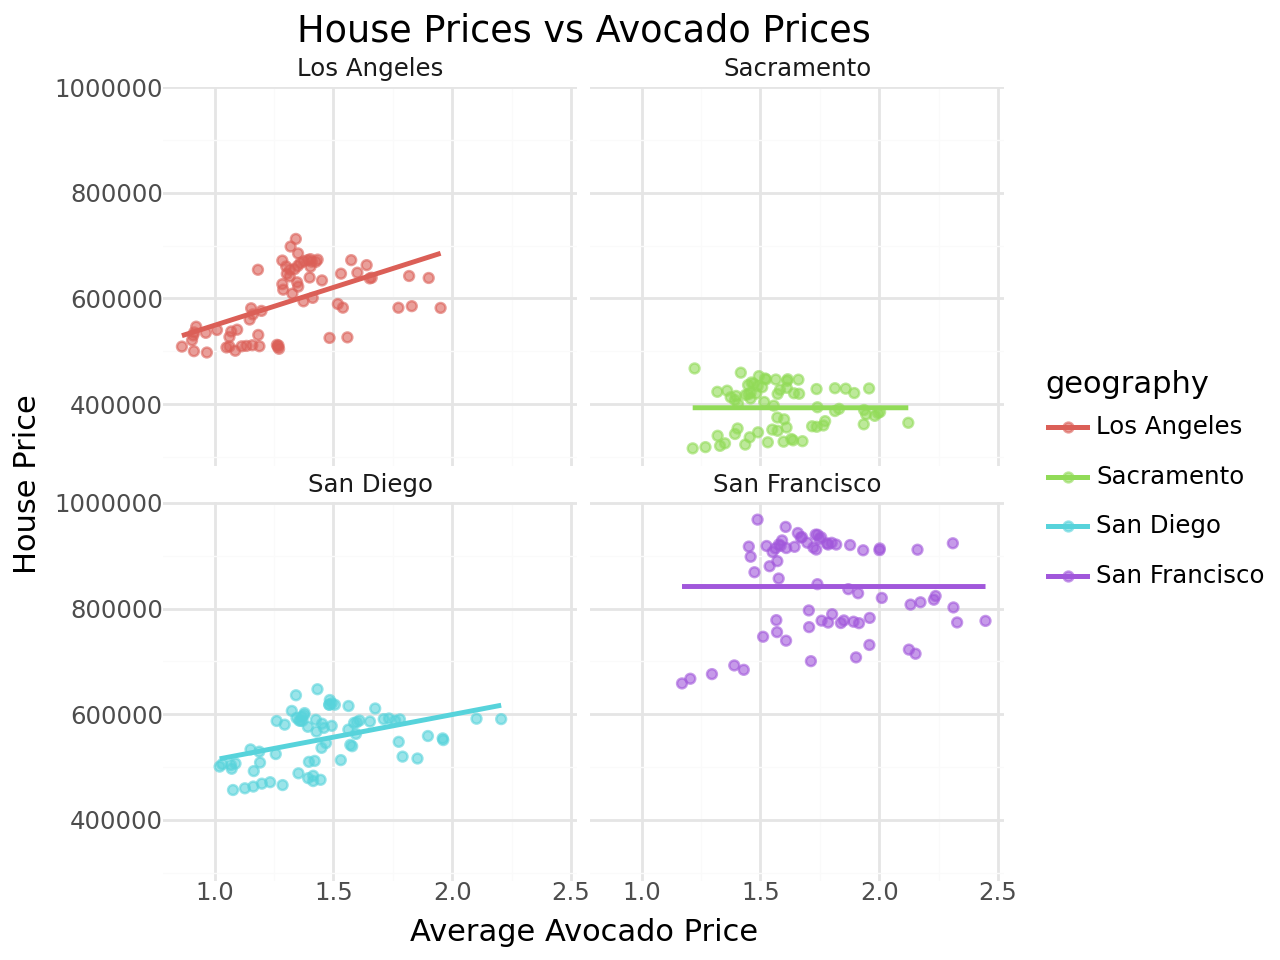

In [29]:
from plotnine import geom_point, geom_smooth
plot4 = (p9.ggplot(joined, aes(
    x = "avg_avocado_price",
    y = "house_price",
    color = "geography"
))
+ geom_point(alpha=0.6)
+ geom_smooth(method="lm",se=False)
+ facet_wrap("~ geography", nrow=2)
+ labs(
    title = "House Prices vs Avocado Prices",
    x = "Average Avocado Price",
    y = "House Price"
)
+ theme_minimal()
)
plot4

We can see from the plot that housing prices in southern California (Los Angeles and San Diego) tend to go up with the average price of avocados, whereas there seems to be almost no correlation between housing prices and average avocado prices in northern California (Sacramento and San Francisco).